# Physik WS21/22 FH Aachen

In [15]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import ode as ode
from matplotlib import cm
from itertools import product
from matplotlib.patches import Circle
import pandas as pd
from IPython.display import display, HTML
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.linear_model import LinearRegression

%matplotlib inline

plt.rcParams.update({'font.family':'serif'})
plt.rcParams.update({'mathtext.fontset':'stix'})




# Praktikum

In [16]:
G=81500
n=263
D_m=10
d=1.0
u=4.00
v=-3.00
a=1/8
k=a*d**u*D_m**v*G/n

In [17]:
print(k)

0.03873574144486692


## Glühlampenversuch

### Aufgabe 1

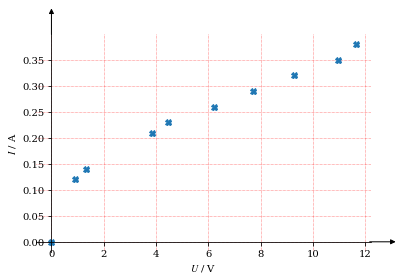

In [18]:
fig, ax = plt.subplots()


#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 30 # In points

# X-axis arrow
ax.annotate('', xy=(0.99, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 0.99), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))




U_1=np.array([0,0.9,1.33,3.86,4.46,6.21,7.72,9.29,10.97,11.64])
I_1=np.array([0,0.12,0.14,0.21,0.23,0.26,0.29,0.32,0.35,0.38])


plt.xlabel(r'$U$ / V')
plt.ylabel(r'$I$ / A')
plt.rc('grid', linestyle=':', color='red', linewidth=0.5)
plt.plot(U_1,I_1,marker='X',linestyle='')
plt.grid(True)
plt.savefig('gluehlampe_aufgabe1_6.eps')

### Aufgabe 2

In [19]:
U_2_alt=np.array([0.0044,0.119,0.197,0.266,0.31,0.41,0.5,0.6,0.72,0.88])
I_2_alt=np.array([3.9,10.5,17.4,23.3,28.1,36.5,43.9,52.6,62.0,74.0])


U_2_neu=np.array([44,63,22,47,68,78,83,88,95,101,110,120,130,136,157,175,197,239,335,430,469,541,681,875,1151,1432,1640])
U_2_neu=U_2_neu*0.001
U_2_neu=np.sort(U_2_neu, axis=0)


I_2_neu=np.array([18.1,25.3,9.4,19.3,26.8,30.7,32.4,34.2,36.7,38.4,41.6,44.8,47.9,49.7,55.7,60.5,66.1,75.9,93.2,106.3,110.7,117.9,129.2,140.7,152.9,162.7,169.3])
I_2_neu=I_2_neu*0.001
I_2_neu=np.sort(I_2_neu, axis=0)


U_2=U_2_neu
I_2=I_2_neu

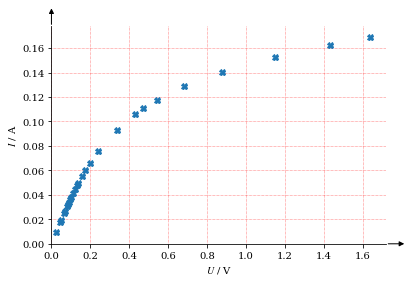

In [20]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.xlabel('U/V')
plt.ylabel('I/A')
plt.ylim([0,np.max(I_2)*1.05])
plt.xlim([0,np.max(U_2)*1.05])


plt.xlabel(r'$U$ / V')
plt.ylabel(r'$I$ / A')

plt.plot(U_2,I_2,marker='X',linestyle='')
plt.grid(True)
plt.savefig('gluehlampe_aufgabe2a.eps')

In [21]:
R_2=U_2/I_2

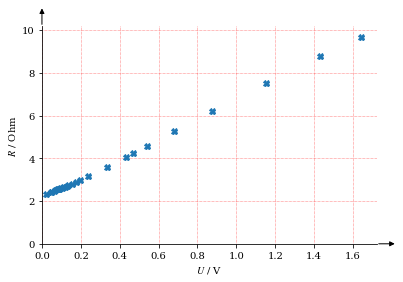

In [22]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))


plt.ylim([0,np.max(R_2)*1.05])
plt.xlim([0,np.max(U_2)*1.05])


plt.xlabel(r'$U$ / V')
plt.ylabel(r'$R$ / Ohm')

plt.plot(U_2,R_2,marker='X',linestyle='')
plt.grid(True)
plt.savefig('gluehlampe_aufgabe2b.eps')

In [23]:
ln_R_2=np.log(R_2)
ln_U_2=np.log(U_2)

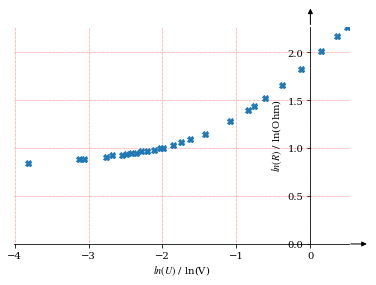

In [24]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))


plt.ylim([0,np.max(ln_R_2)])
plt.xlim([np.min(ln_U_2)*1.05,np.max(ln_U_2)*1.05])


plt.xlabel(r'$ln(U)$ / ln(V)')
plt.ylabel(r'$ln(R)$ / ln(Ohm)')

plt.plot(ln_U_2,ln_R_2,marker='X',linestyle='')
plt.grid(True)
plt.savefig('gluehlampe_aufgabe2c.eps')

In [25]:
#Lineare Regression in Phyton
x=15
U_2_reshape=U_2[0:x].reshape(-1,1)
model=LinearRegression(fit_intercept=True)
model.fit(U_2_reshape,R_2[0:x])
print('Intercept',model.intercept_)
print('Slope',model.coef_)
U_2_model=np.linspace(0,np.max(U_2)*1.1,10)
R_2_model=U_2_model*model.coef_+model.intercept_
R_2_0=model.intercept_
print(U_2)
print(R_2)
print(U_2_model)
print(R_2_model)

Intercept 2.2773902952893144
Slope [3.39743946]
[0.022 0.044 0.047 0.063 0.068 0.078 0.083 0.088 0.095 0.101 0.11  0.12
 0.13  0.136 0.157 0.175 0.197 0.239 0.335 0.43  0.469 0.541 0.681 0.875
 1.151 1.432 1.64 ]
[2.34042553 2.43093923 2.43523316 2.49011858 2.53731343 2.54071661
 2.5617284  2.57309942 2.58855586 2.63020833 2.64423077 2.67857143
 2.71398747 2.73641851 2.81867145 2.89256198 2.98033283 3.14888011
 3.5944206  4.04515522 4.2366757  4.58863444 5.27089783 6.21890547
 7.52779595 8.80147511 9.68694625]
[0.         0.20044444 0.40088889 0.60133333 0.80177778 1.00222222
 1.20266667 1.40311111 1.60355556 1.804     ]
[2.2773903  2.95838816 3.63938602 4.32038389 5.00138175 5.68237962
 6.36337748 7.04437535 7.72537321 8.40637108]


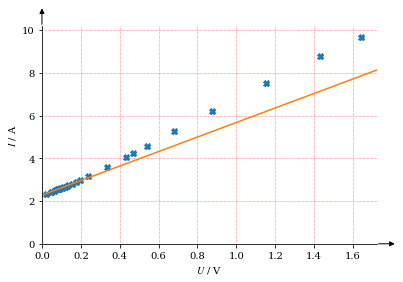

In [26]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.xlabel('U/V')
plt.ylabel('I/A')
plt.ylim([0,np.max(R_2)*1.05])
plt.xlim([0,np.max(U_2)*1.05])


plt.xlabel(r'$U$ / V')
plt.ylabel(r'$I$ / A')

plt.plot(U_2,R_2,marker='X',linestyle='')
plt.plot(U_2_model,R_2_model,marker='',linestyle='-')
plt.grid(True)
plt.savefig('gluehlampe_aufgabe2_model.eps')

In [30]:
ln_R_2=np.log(R_2-R_2_0)
ln_U_2=np.log(U_2)
#ln_R_2_hat=savgol_filter(ln_R_2, 13, 5)


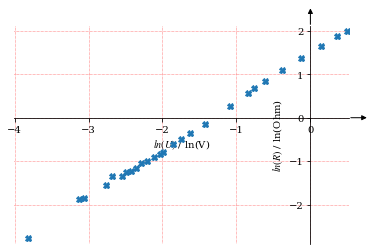

In [31]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))


plt.ylim([np.min(ln_R_2)*1.05,np.max(ln_R_2)*1.05])
plt.xlim([np.min(ln_U_2)*1.05,np.max(ln_U_2)*1.05])


plt.xlabel(r'$ln(U)$ / ln(V)')
plt.ylabel(r'$ln(R)$ / ln(Ohm)')

plt.plot(ln_U_2,ln_R_2,marker='X',linestyle='')


plt.grid(True)
plt.savefig('gluehlampe_aufgabe2c.eps')

In [32]:
ln_RU_slope=np.zeros(np.shape(ln_R_2)[0]-1)
for i in range(np.shape(ln_R_2)[0]-1):
    ln_RU_slope[i]=(ln_R_2[i+1]-ln_R_2[i])/(ln_U_2[i+1]-ln_U_2[i])
print(ln_RU_slope)


[1.28446805 0.41815613 1.01852825 2.6235756  0.09481008 1.23559969
 0.67033827 0.66564944 2.05127184 0.45659203 1.02843967 1.05691018
 1.11037711 1.14789407 1.17894188 1.12629857 1.11212473 1.22289286
 1.17897475 1.18482739 1.15677208 1.123909   1.09757316 1.04587646
 0.9942978  0.93840076]


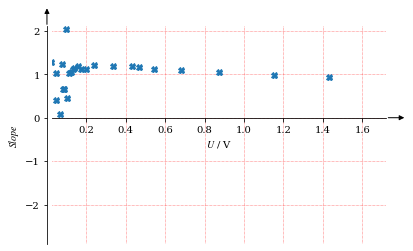

In [33]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))


plt.ylim([np.min(ln_R_2)*1.05,np.max(ln_R_2)*1.05])
plt.xlim([np.min(U_2)*1.05,np.max(U_2)*1.05])


plt.xlabel(r'$U$ / V')
plt.ylabel(r'$Slope$')

plt.plot(U_2[0:(np.shape(ln_RU_slope)[0])],ln_RU_slope,marker='X',linestyle='')

plt.grid(True)
plt.savefig('gluehlampe_aufgabe2c.eps')

### Aufgabe 3

In [34]:
U_2.sort()
I_2.sort()
R_2=np.divide(U_2,I_2)
print(R_2)

[2.34042553 2.43093923 2.43523316 2.49011858 2.53731343 2.54071661
 2.5617284  2.57309942 2.58855586 2.63020833 2.64423077 2.67857143
 2.71398747 2.73641851 2.81867145 2.89256198 2.98033283 3.14888011
 3.5944206  4.04515522 4.2366757  4.58863444 5.27089783 6.21890547
 7.52779595 8.80147511 9.68694625]


In [35]:
results=np.vstack((U_2,I_2,R_2))
results=np.around(results,4,out=None)
print(results)

[[2.2000e-02 4.4000e-02 4.7000e-02 6.3000e-02 6.8000e-02 7.8000e-02
  8.3000e-02 8.8000e-02 9.5000e-02 1.0100e-01 1.1000e-01 1.2000e-01
  1.3000e-01 1.3600e-01 1.5700e-01 1.7500e-01 1.9700e-01 2.3900e-01
  3.3500e-01 4.3000e-01 4.6900e-01 5.4100e-01 6.8100e-01 8.7500e-01
  1.1510e+00 1.4320e+00 1.6400e+00]
 [9.4000e-03 1.8100e-02 1.9300e-02 2.5300e-02 2.6800e-02 3.0700e-02
  3.2400e-02 3.4200e-02 3.6700e-02 3.8400e-02 4.1600e-02 4.4800e-02
  4.7900e-02 4.9700e-02 5.5700e-02 6.0500e-02 6.6100e-02 7.5900e-02
  9.3200e-02 1.0630e-01 1.1070e-01 1.1790e-01 1.2920e-01 1.4070e-01
  1.5290e-01 1.6270e-01 1.6930e-01]
 [2.3404e+00 2.4309e+00 2.4352e+00 2.4901e+00 2.5373e+00 2.5407e+00
  2.5617e+00 2.5731e+00 2.5886e+00 2.6302e+00 2.6442e+00 2.6786e+00
  2.7140e+00 2.7364e+00 2.8187e+00 2.8926e+00 2.9803e+00 3.1489e+00
  3.5944e+00 4.0452e+00 4.2367e+00 4.5886e+00 5.2709e+00 6.2189e+00
  7.5278e+00 8.8015e+00 9.6869e+00]]


In [36]:
results_3=np.vstack((U_2,I_2,R_2))
results_3=np.around(results,4,out=None)
print(results_3)


panda_df = pd.DataFrame(data = results_3,  
                        index = ["U/V", "I/A", "R/Ohm"]) 
  
print(panda_df) 
display(HTML(panda_df.to_html()))
#%panda_df.to_latex() #USE IF EXPORT TO LATEX IS NEEDED!!

[[2.2000e-02 4.4000e-02 4.7000e-02 6.3000e-02 6.8000e-02 7.8000e-02
  8.3000e-02 8.8000e-02 9.5000e-02 1.0100e-01 1.1000e-01 1.2000e-01
  1.3000e-01 1.3600e-01 1.5700e-01 1.7500e-01 1.9700e-01 2.3900e-01
  3.3500e-01 4.3000e-01 4.6900e-01 5.4100e-01 6.8100e-01 8.7500e-01
  1.1510e+00 1.4320e+00 1.6400e+00]
 [9.4000e-03 1.8100e-02 1.9300e-02 2.5300e-02 2.6800e-02 3.0700e-02
  3.2400e-02 3.4200e-02 3.6700e-02 3.8400e-02 4.1600e-02 4.4800e-02
  4.7900e-02 4.9700e-02 5.5700e-02 6.0500e-02 6.6100e-02 7.5900e-02
  9.3200e-02 1.0630e-01 1.1070e-01 1.1790e-01 1.2920e-01 1.4070e-01
  1.5290e-01 1.6270e-01 1.6930e-01]
 [2.3404e+00 2.4309e+00 2.4352e+00 2.4901e+00 2.5373e+00 2.5407e+00
  2.5617e+00 2.5731e+00 2.5886e+00 2.6302e+00 2.6442e+00 2.6786e+00
  2.7140e+00 2.7364e+00 2.8187e+00 2.8926e+00 2.9803e+00 3.1489e+00
  3.5944e+00 4.0452e+00 4.2367e+00 4.5886e+00 5.2709e+00 6.2189e+00
  7.5278e+00 8.8015e+00 9.6869e+00]]
           0       1       2       3       4       5       6       7       

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
U/V,0.0220,0.0440,0.0470,0.0630,0.0680,0.0780,0.0830,0.0880,0.0950,0.1010,0.1100,0.1200,0.1300,0.1360,0.1570,0.1750,0.1970,0.2390,0.3350,0.4300,0.4690,0.5410,0.6810,0.8750,1.1510,1.4320,1.6400
I/A,0.0094,0.0181,0.0193,0.0253,0.0268,0.0307,0.0324,0.0342,0.0367,0.0384,0.0416,0.0448,0.0479,0.0497,0.0557,0.0605,0.0661,0.0759,0.0932,0.1063,0.1107,0.1179,0.1292,0.1407,0.1529,0.1627,0.1693
R/Ohm,2.3404,2.4309,2.4352,2.4901,2.5373,2.5407,2.5617,2.5731,2.5886,2.6302,2.6442,2.6786,2.7140,2.7364,2.8187,2.8926,2.9803,3.1489,3.5944,4.0452,4.2367,4.5886,5.2709,6.2189,7.5278,8.8015,9.6869


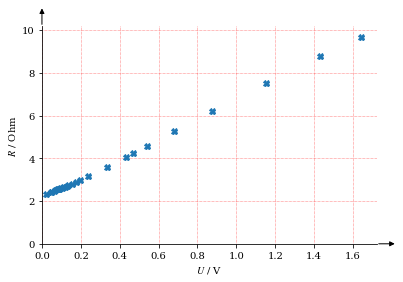

In [37]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.xlabel('U/V')
plt.ylabel('I/A')
plt.ylim([0,np.max(R_2)*1.05])
plt.xlim([0,np.max(U_2)*1.05])


plt.xlabel(r'$U$ / V')
plt.ylabel(r'$R$ / Ohm')

plt.plot(U_2,R_2,marker='X',linestyle='')
plt.grid(True)
plt.savefig('gluehlampe_aufgabe2_model.eps')

In [38]:
#Lineare Regression in Phyton
U_2_reshape=U_2.reshape(-1,1)
model=LinearRegression(fit_intercept=True)
model.fit(U_2_reshape,R_2)
print('Intercept',model.intercept_)
print('Slope',model.coef_)
U_2_model=np.linspace(0,np.max(U_2)*1.1,10)
R_2_model=U_2_model*model.coef_+model.intercept_

Intercept 2.143510845838726
Slope [4.61113988]


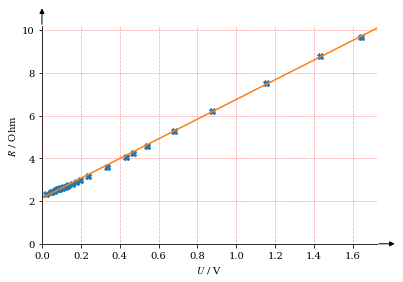

In [39]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.xlabel('U/V')
plt.ylabel('I/A')
plt.ylim([0,np.max(R_2)*1.05])
plt.xlim([0,np.max(U_2)*1.05])


plt.xlabel(r'$U$ / V')
plt.ylabel(r'$R$ / Ohm')
plt.plot(U_2,R_2,marker='X',linestyle='')
plt.plot(U_2_model,R_2_model,marker='',linestyle='-')
plt.grid(True)
plt.savefig('gluehlampe_aufgabe2_model.eps')

### Aufgabe 6

In [40]:
I=1
U_6=np.array([0.363,0.357,0.358,0.368,0.380,0.406,0.380,0.400,0.394,0.428])
l=np.array([0.02,0.20,0.26,0.36,0.49,0.51,0.69,0.79,0.82,0.92])
R_6=U_6/I
print(l,U_6,R_6)

[0.02 0.2  0.26 0.36 0.49 0.51 0.69 0.79 0.82 0.92] [0.363 0.357 0.358 0.368 0.38  0.406 0.38  0.4   0.394 0.428] [0.363 0.357 0.358 0.368 0.38  0.406 0.38  0.4   0.394 0.428]


In [41]:
results_6=np.vstack((l,U_6,R_6))
results_6=np.around(results_6,2,out=None)
print(results_6)


panda_df_6 = pd.DataFrame(data = results_6,  
                        index = ["l/m", "U/V", "R/Ohm"]) 
  
print(panda_df_6) 
display(HTML(panda_df_6.to_html()))
#panda_df.to_latextex() USE IF EXPORT TO LATEX IS NEEDED!!

[[0.02 0.2  0.26 0.36 0.49 0.51 0.69 0.79 0.82 0.92]
 [0.36 0.36 0.36 0.37 0.38 0.41 0.38 0.4  0.39 0.43]
 [0.36 0.36 0.36 0.37 0.38 0.41 0.38 0.4  0.39 0.43]]
          0     1     2     3     4     5     6     7     8     9
l/m    0.02  0.20  0.26  0.36  0.49  0.51  0.69  0.79  0.82  0.92
U/V    0.36  0.36  0.36  0.37  0.38  0.41  0.38  0.40  0.39  0.43
R/Ohm  0.36  0.36  0.36  0.37  0.38  0.41  0.38  0.40  0.39  0.43


,0,1,2,3,4,5,6,7,8,9
l/m,0.02,0.20,0.26,0.36,0.49,0.51,0.69,0.79,0.82,0.92
U/V,0.36,0.36,0.36,0.37,0.38,0.41,0.38,0.40,0.39,0.43
R/Ohm,0.36,0.36,0.36,0.37,0.38,0.41,0.38,0.40,0.39,0.43


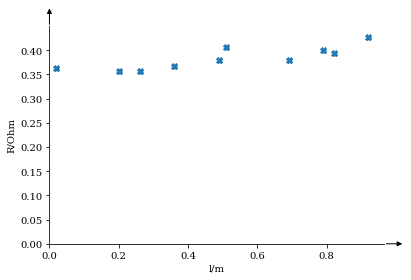

In [42]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('R/Ohm')
plt.xlabel('l/m')
plt.ylim([0,np.max(R_6)*1.05])
plt.xlim([0,np.max(l)*1.05])


plt.plot(l,R_6,marker='X',linestyle='')
plt.savefig('gluehlampe_aufgabe6.pdf')

### Aufgabe 7

In [43]:
U_7=np.array([0.19,0.43,0.64,0.78,1.10,1.52,1.76,2.14,2.34,2.70])
I_7=np.array([0.07,0.16,0.23,0.30,0.43,0.57,0.63,0.75,0.88,0.93])

In [44]:
results_7=np.vstack((U_7,I_7))
results_7=np.around(results_7,2,out=None)
#print(results_7)


panda_df_7 = pd.DataFrame(data = results_7,  
                        index = ["U/V", "I/A"]) 
  
#print(panda_df_6) 
display(HTML(panda_df_7.to_html()))
#panda_df.to_latextex() USE IF EXPORT TO LATEX IS NEEDED!!

,0,1,2,3,4,5,6,7,8,9
U/V,0.19,0.43,0.64,0.78,1.10,1.52,1.76,2.14,2.34,2.70
I/A,0.07,0.16,0.23,0.30,0.43,0.57,0.63,0.75,0.88,0.93


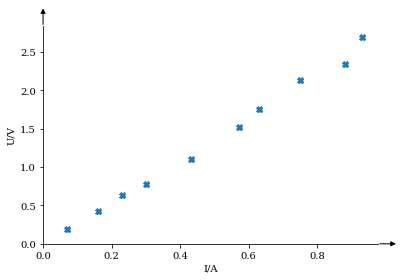

In [45]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('U/V')
plt.xlabel('I/A')
plt.xlim([0,np.max(I_7)*1.05])
plt.ylim([0,np.max(U_7)*1.05])


plt.plot(I_7,U_7,marker='X',linestyle='')
plt.savefig('gluehlampe_aufgabe7.pdf')

In [46]:
#Lineare Regression in Phyton
I_7=I_7.reshape(-1,1)
model=LinearRegression(fit_intercept=False)
model.fit(I_7,U_7)
print('Intercept',model.intercept_)
print('Slope',model.coef_)

Intercept 0.0
Slope [2.76873153]


In [47]:
I_model=np.linspace(0,1,100)
U_model=I_model*model.coef_[0]


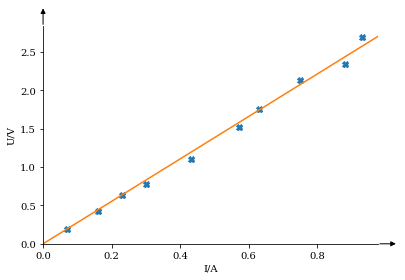

In [48]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('U/V')
plt.xlabel('I/A')
plt.xlim([0,np.max(I_7)*1.05])
plt.ylim([0,np.max(U_7)*1.05])


plt.plot(I_7,U_7,marker='X',linestyle='')
plt.plot(I_model,U_model)
plt.savefig('gluehlampe_aufgabe7.pdf')

### Aufgabe 6, jedoch mit U vs. I Messung über Siebewiderstand

In [49]:
U_6neu1=np.array([0.109,0.185,0.227,0.253,0.284,0.328,0.378,0.421,0.480,0.594,0.649,0.712,0.771,0.843,0.978,1.111,1.289])
I_6neu1=np.array([12.9,21.9,26.8,29.9,33.6,38.8,44.7,49.8,56.6,70.1,76.4,83.7,90.3,98.6,114.2,129.1,148.8])
I_6neu1=I_6neu1/1000


U_6nurkabel=np.array([0.046,0.200,0.215,0.240,0.254,0.273,0.289,0.306,0.335,0.361,0.391,0.422,0.486,0.564,0.754,1.052,1.270])
I_6nurkabel=np.array([5.4,23.9,25.7,28.7,30.4,32.6,34.5,36.6,40.0,43.2,46.7,50.4,58.1,67.4,89.5,124.4,149.2])
I_6nurkabel=I_6nurkabel/1000

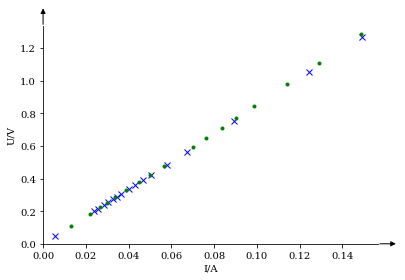

In [50]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('U/V')
plt.xlabel('I/A')
plt.xlim([0,np.max(I_6nurkabel)*1.05])
plt.ylim([0,np.max(U_6nurkabel)*1.05])


plt.plot(I_6nurkabel,U_6nurkabel,marker='x',linestyle='',color='blue')
plt.plot(I_6neu1,U_6neu1,marker='.',linestyle='',color='green')




In [51]:
#Lineare Regression in Phyton
I_6nurkabel_reshape=I_6nurkabel.reshape(-1,1)
model=LinearRegression(fit_intercept=False)
model.fit(I_6nurkabel_reshape,U_6nurkabel)
print('Intercept',model.intercept_)
print('Slope',model.coef_)
I_model=np.linspace(0,np.max(I_6neu1),100)
U_model=I_model*model.coef_[0]
R_ohne_Kupfer=model.coef_[0]



Intercept 0.0
Slope [8.44143421]


In [52]:
#Lineare Regression in Phyton
I_6neu1_reshape=I_6neu1.reshape(-1,1)
model=LinearRegression(fit_intercept=False)
model.fit(I_6neu1_reshape,U_6neu1)
print('Intercept',model.intercept_)
print('Slope',model.coef_)
I_model=np.linspace(0,np.max(I_6neu1),100)
U_model=I_model*model.coef_
R_mit_Kupfer=model.coef_[0]

Intercept 0.0
Slope [8.56396696]


In [53]:
R=R_mit_Kupfer-R_ohne_Kupfer #Widerstand in Ohm
l=1 #Länge in Metern
d=0.44e-3 #Durchmesser in Metern
r=d/2
A=np.pi*r**2
rho_0=R/l*A
print(rho_0)

1.8631482919264153e-08


## Wiederholung mit dünnerem Kupferkabel

In [54]:
U_6neu2=np.array([0.122,0.209,0.224,0.288,0.320,0.370,0.444,0.567,0.980,0.901,1.321,1.589])
I_6neu2=np.array([14.2,24.0,25.7,33.2,37.0,42.8,51.4,65.4,113.0,102.1,148.8,177.3])
I_6neu2=I_6neu2/1000


U_6nurkabel2=np.array([0.151,0.187,0.226,0.260,0.293,0.354,0.434,0.572,0.747,1.024,1.505,1.299])
I_6nurkabel2=np.array([17.3,21.7,26.0,30.1,33.8,41.2,50.5,66.6,86.8,118.7,169.7,147.9])
I_6nurkabel2=I_6nurkabel2/1000


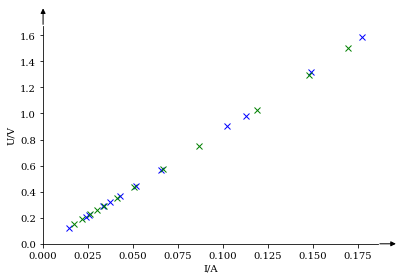

In [55]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('U/V')
plt.xlabel('I/A')
plt.xlim([0,np.max(I_6neu2)*1.05])
plt.ylim([0,np.max(U_6neu2)*1.05])


plt.plot(I_6neu2,U_6neu2,marker='x',linestyle='',color='blue')
plt.plot(I_6nurkabel2,U_6nurkabel2,marker='x',linestyle='',color='green')




In [56]:
#Lineare Regression in Phyton
I_6nurkabel2_reshape=I_6nurkabel2.reshape(-1,1)
model=LinearRegression(fit_intercept=False)
model.fit(I_6nurkabel2_reshape,U_6nurkabel2)
print('Intercept',model.intercept_)
print('Slope',model.coef_)
I_model=np.linspace(0,np.max(I_6neu1),100)
U_model=I_model*model.coef_[0]
R_ohne_Kupfer_2=model.coef_[0]



Intercept 0.0
Slope [8.7456364]


In [57]:
#Lineare Regression in Phyton
I_6neu2_reshape=I_6neu2.reshape(-1,1)
model=LinearRegression(fit_intercept=False)
model.fit(I_6neu2_reshape,U_6neu2)
print('Intercept',model.intercept_)
print('Slope',model.coef_)
I_model=np.linspace(0,np.max(I_6neu2_reshape),100)
U_model=I_model*model.coef_
R_mit_Kupfer_2=model.coef_[0]

Intercept 0.0
Slope [8.84120144]


In [58]:
R=R_mit_Kupfer_2-R_ohne_Kupfer_2 #Widerstand in Ohm
l=1 #Länge in Metern
d=0.38e-3 #Durchmesser in Metern
r=d/2
A=np.pi*r**2
rho_0=R/l*A
print(rho_0)

1.083817439225628e-08


In [59]:
#Bestimmung Länge des Kupferkabels

In [60]:
U_7neu=np.array([4.89,3.39,2.67,2.36,2.21,1.84,1.65,1.49,1.38,1.24,1.08,0.98,0.85,0.81,0.74,0.62,0.56])
I_7neu=np.array([1.01,0.70,0.55,0.49,0.45,0.38,0.34,0.30,0.28,0.25,0.22,0.2,0.17,0.16,0.15,0.12,0.11])

In [61]:
#Lineare Regression in Phyton
I_7neu_reshape=I_7neu.reshape(-1,1)
model=LinearRegression(fit_intercept=False)
model.fit(I_7neu_reshape,U_7neu)
print('Intercept',model.intercept_)
print('Slope',model.coef_)
I_model=np.linspace(0,np.max(I_7neu),100)
U_model=I_model*model.coef_[0]

Intercept 0.0
Slope [4.86371681]


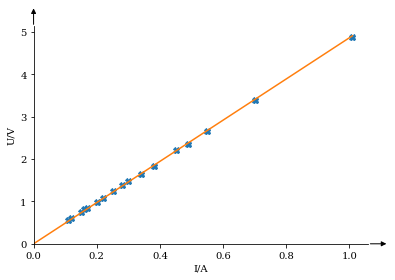

In [62]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('U/V')
plt.xlabel('I/A')
plt.xlim([0,np.max(I_7neu)*1.05])
plt.ylim([0,np.max(U_7neu)*1.05])


plt.plot(I_7neu,U_7neu,marker='X',linestyle='')

plt.plot(I_model,U_model)
plt.savefig('gluehlampe_aufgabe7neufit.pdf')

## Federversuch

### Aufgabe 1

In [63]:
m=np.array([200,150,50,350,400,250,500,300]) #in g
s=np.array([117,94,30,215,243,149,317,174]) # in mm
m_neu=np.array([100,300,500,700,200,400,900,1100])
s_neu=np.array([7,25,41,61,15,32,81,99])


m_1=np.array([500,300,400,450,350,100,150,250,200])
s_1=np.array([30.5,18,24,27,21,5.5,8.5,14.5,11.5]) #in cm
s_1=s_1*10 #damit s_1 in mm

m_2=np.array([900,700,500,300,100,150,350,550,750,850,200,400,600,800])
s_2=np.array([21.5,16.5,11.5,7,2.5,3.5,8.5,13,17.5,20.5,5,10,14,19.5]) # in cm
s_2=s_2*10 #damit s_2 in mm

m_2_neu=np.array([200,400,600,800,900])
s_2_neu=np.array([40,90,135,182,205])


m_7=np.array([1600,1400,1200,1000,800,600,400,200,100,300,500,700,900,1100,1300,1500,1650]) # in g
s_7=np.array([72,63,54,45,35,24,16,6,2,12,22,31,42,52,62,71,77]) # in mm

m_8=np.array([1650,1600,1500,1400,1300])
s_8=np.array([148,140,132,126,116])

k_array=np.zeros(8)

m=m_2
s=s_2
F=m*9.81/1000
print(F)


[8.829  6.867  4.905  2.943  0.981  1.4715 3.4335 5.3955 7.3575 8.3385
 1.962  3.924  5.886  7.848 ]


In [64]:
#Lineare Regression in Phyton
F_reshape=F.reshape(-1,1)
model=LinearRegression(fit_intercept=True)
model.fit(F_reshape,s)
print('Intercept',model.intercept_)
print('Slope',model.coef_)

k_array[0]=model.coef_[0]**(-1)

for i in range(np.size(k_array)):
    print("k ist ",np.format_float_scientific(k_array[i], unique=False, precision=3),"in N/mm")
    print("k ist ",np.format_float_scientific(k_array[i]*1000, unique=False, precision=3),"in N/m")
s_calc=F*model.coef_+model.intercept_



Intercept 0.4114713216958421
Slope [24.22587771]
k ist  4.128e-02 in N/mm
k ist  4.128e+01 in N/m
k ist  0.000e+00 in N/mm
k ist  0.000e+00 in N/m
k ist  0.000e+00 in N/mm
k ist  0.000e+00 in N/m
k ist  0.000e+00 in N/mm
k ist  0.000e+00 in N/m
k ist  0.000e+00 in N/mm
k ist  0.000e+00 in N/m
k ist  0.000e+00 in N/mm
k ist  0.000e+00 in N/m
k ist  0.000e+00 in N/mm
k ist  0.000e+00 in N/m
k ist  0.000e+00 in N/mm
k ist  0.000e+00 in N/m


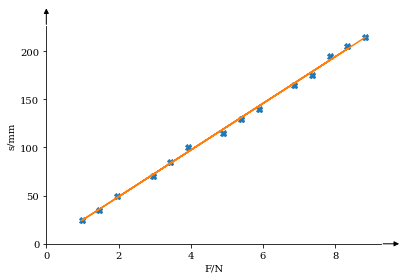

In [65]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('s/mm')
plt.xlabel('F/N')
plt.xlim([0,np.max(F)*1.05])
plt.ylim([0,np.max(s)*1.05])


plt.plot(F,s,marker='X',linestyle='')

plt.plot(F,s_calc,marker='',linestyle='-')
plt.savefig('federversuch_aufgabe1.pdf')

## Aufgabe 5

In [66]:
g=9.81
d=np.array([0.8,1,1.25,1.6])
m=np.array([500,500,500,500])
s=np.array([356,143,56,18])
F=m/1000*g
k=F/(s*1e-3)
print(k)

[ 13.77808989  34.3006993   87.58928571 272.5       ]


In [67]:
results_5=np.vstack((d,m,F,s,k))
results_5=np.around(results_5,3,out=None)
#print(results_5)


panda_df_5 = pd.DataFrame(data = results_5,  
                        index = ["d/mm", "m/g", "F/N", "s/mm", "k/(N/m)"]) 
  
#print(panda_df_5) 
display(HTML(panda_df_5.to_html()))
panda_df_5.to_latex() #USE IF EXPORT TO LATEX IS NEEDED!!

,0,1,2,3
d/mm,0.800,1.000,1.250,1.600
m/g,500.000,500.000,500.000,500.000
F/N,4.905,4.905,4.905,4.905
s/mm,356.000,143.000,56.000,18.000
k/(N/m),13.778,34.301,87.589,272.500


'\\begin{tabular}{lrrrr}\n\\toprule\n{} &        0 &        1 &        2 &        3 \\\\\n\\midrule\nd/mm    &    0.800 &    1.000 &    1.250 &    1.600 \\\\\nm/g     &  500.000 &  500.000 &  500.000 &  500.000 \\\\\nF/N     &    4.905 &    4.905 &    4.905 &    4.905 \\\\\ns/mm    &  356.000 &  143.000 &   56.000 &   18.000 \\\\\nk/(N/m) &   13.778 &   34.301 &   87.589 &  272.500 \\\\\n\\bottomrule\n\\end{tabular}\n'

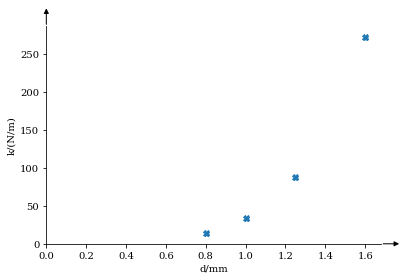

In [68]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('k/(N/m)')
plt.xlabel('d/mm')
plt.xlim([0,np.max(d)*1.05])
plt.ylim([0,np.max(k)*1.05])


plt.plot(d,k,marker='X',linestyle='')
plt.savefig('federversuch_aufgabe5.pdf')

In [69]:
ln_k=np.log(k)
ln_d=np.log(d)
print(ln_k)

[2.62307964 3.53516574 4.47265868 5.60763861]


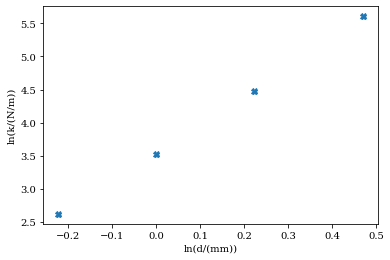

In [70]:


plt.ylabel('ln(k/(N/m))')
plt.xlabel('ln(d/(mm))')


plt.plot(ln_d,ln_k,marker='X',linestyle='')
plt.savefig('federversuch_aufgabe5_log.pdf')

In [71]:
#Lineare Regression in Phyton
ln_d=ln_d.reshape(-1,1)
model=LinearRegression(fit_intercept=True)
model.fit(ln_d,ln_k)
print('Intercept',model.intercept_)
print('Slope',model.coef_)

Intercept 3.554534609904646
Slope [4.29869923]


### Aufgabe 6

In [72]:
g=9.81
D=np.array([17.75,16,12.5,10])
m_6=np.array([500,500,500,500])
s_6=np.array([139,117,55,37])
F_6=m_6/1000*g
k_6=F_6/(s_6/1e3)



In [73]:
results_6=np.vstack((D,m_6,F_6,s_6,k_6))
results_6=np.around(results_6,3,out=None)
#print(results_5)


panda_df_6 = pd.DataFrame(data = results_6,  
                        index = ["D_m/mm", "m/g", "F/N", "s/mm", "k/(N/m)"]) 
  
#print(panda_df_5) 
display(HTML(panda_df_6.to_html()))
#panda_df.to_latextex() USE IF EXPORT TO LATEX IS NEEDED!!

,0,1,2,3
D_m/mm,17.750,16.000,12.500,10.000
m/g,500.000,500.000,500.000,500.000
F/N,4.905,4.905,4.905,4.905
s/mm,139.000,117.000,55.000,37.000
k/(N/m),35.288,41.923,89.182,132.568


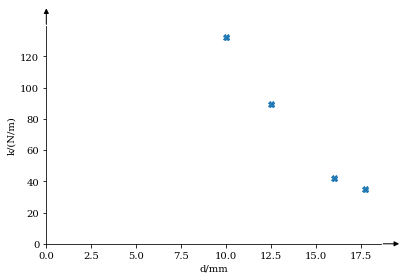

In [74]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('k/(N/m)')
plt.xlabel('d/mm')
plt.xlim([0,np.max(D)*1.05])
plt.ylim([0,np.max(k_6)*1.05])


plt.plot(D,k_6,marker='X',linestyle='')
plt.savefig('federversuch_aufgabe6.pdf')

In [75]:
ln_k=np.log(k_6)
ln_D_m=np.log(D)

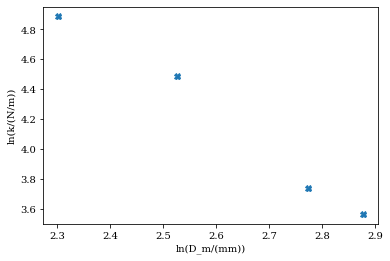

In [76]:
plt.ylabel('ln(k/(N/m))')
plt.xlabel('ln(D_m/(mm))')


plt.plot(ln_D_m,ln_k,marker='X',linestyle='')
plt.savefig('federversuch_aufgabe6_log.pdf')

In [77]:
#Lineare Regression in Phyton
ln_D_m=ln_D_m.reshape(-1,1)
model=LinearRegression(fit_intercept=True)
model.fit(ln_D_m,ln_k)
print('Intercept',model.intercept_)
print('Slope',model.coef_)

Intercept 10.49277518559018
Slope [-2.41417037]


### Aufgabe 7

In [78]:
d=np.array([0.8,1,1.25,1.25,1.25,1.25,1.25,1.6])
D=np.array([10,10,17.75,16,12.5,10,10,10])
n=np.array([263,263,125,125,125,263,125,263])
G=81500 #wir rechnen alles in mm, somit müssen wir gleich nur noch k auch in N/m ausdrücken
k=np.array([16.46,40.875,34.335,48.246,111.477,95.707,199.833,270])
k=k/1000
var=d**4*D**(-3)/n*G

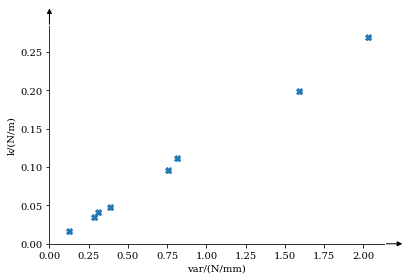

In [79]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('k/(N/m)')
plt.xlabel('var/(N/mm)')
plt.xlim([0,np.max(var)*1.05])
plt.ylim([0,np.max(k)*1.05])


plt.plot(var,k,marker='X',linestyle='')
plt.savefig('federversuch_aufgabe7.pdf')

In [80]:
#Lineare Regression in Phyton
var=var.reshape(-1,1)
model=LinearRegression(fit_intercept=False)
model.fit(var,k)
print('Intercept',model.intercept_)
print('Slope',model.coef_)

Intercept 0.0
Slope [0.13022982]


## Felgenversuch 

### Aufgabe 1

In [81]:
import numpy as np
phi_0=np.linspace(0,180,19)
t_0=np.array([0,3.72,4.98,5.65,6.53,7.40,9.00,9.39,10.29,10.13,10.32,11.01,12.44,11.7,14.04,14.66,13.83,15.38,15.14]) #Testweise nehme ich nur die erste Messreihe

phi_1=np.array([10,20,30,60,90,120,150,180,270,360])
t_1=np.array([1.42,2.13,2.85,3.87,4.46,5.26,5.87,6.91,8.59,9.64])

phi_2=np.array([30,80,120,180,250])
t_2=np.array([2.14,3.54,4.27,5.41,6.14])

phi_3=np.array([])
t_mess=np.array([(),()])

print(np.mean(t_mess[0]))

print(np.size(t_mess))

print(range(t_mess.shape[0]))

t_3=np.zeros(t_mess.shape[0])
for i in range(t_mess.shape[0]):
    t_3[i]=np.mean(t_mess[i])
    

print(t_3)

phi=phi_1
t=t_1

nan
0
range(0, 2)
[nan nan]


/Users/ce4714e/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ce4714e/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


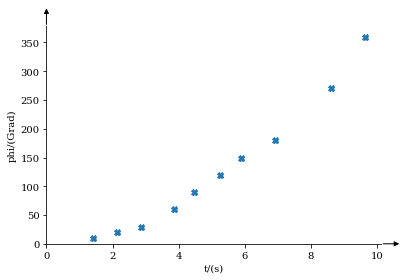

In [82]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('phi/(Grad)')
plt.xlabel('t/(s)')
plt.xlim([0,np.max(t)*1.05])
plt.ylim([0,np.max(phi)*1.05])

plt.plot(t,phi,marker='X',linestyle='')
plt.savefig('felgenversuch_aufgabe1.pdf')

In [83]:
d_scheibe=8e-2
m=31e-3
g=9.81
M_G=m*g*d_scheibe/2

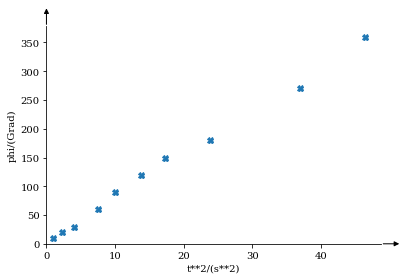

In [84]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('phi/(Grad)')
plt.xlabel('t**2/(s**2)')
plt.xlim([0,np.max(t**2/2)*1.05])
plt.ylim([0,np.max(phi)*1.05])


plt.plot(t**2/2,phi,marker='X',linestyle='')
plt.savefig('felgenversuch_aufgabe3_log.pdf')

In [85]:
#Lineare Regression in Phyton
t_square_half=t**2/2
t_square_half=t_square_half.reshape(-1,1)
model=LinearRegression(fit_intercept=False)
model.fit(t_square_half,phi)
print('Intercept',model.intercept_)
print('Slope',model.coef_)
beta=model.coef_ # in grad
print('In grad/s**2',beta,'In 1/s**2',beta/180*np.pi)

phi_reg=np.linspace(0,360,100)
t_square_half_reg=phi_reg/model.coef_

Intercept 0.0
Slope [7.72757944]
In grad/s**2 [7.72757944] In 1/s**2 [0.1348717]


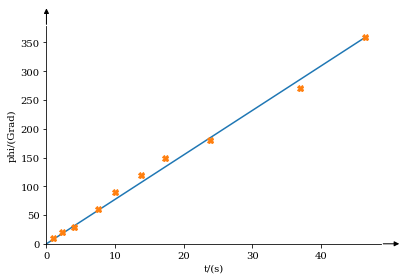

In [86]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('phi/(Grad)')
plt.xlabel('t/(s)')
plt.xlim([0,np.max(t**2/2)*1.05])
plt.ylim([0,np.max(phi)*1.05])

plt.plot(t_square_half_reg,phi_reg,marker='',linestyle='-')
plt.plot(t**2/2,phi,marker='X',linestyle='')
plt.savefig('felgenversuch_aufgabe3_reg.pdf')

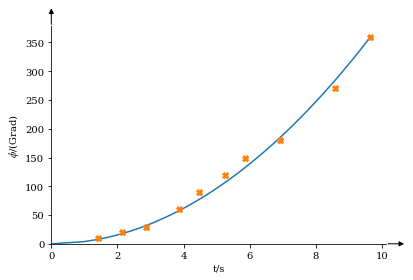

In [87]:
fig, ax = plt.subplots()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.ylabel('$\phi$/(Grad)')
plt.xlabel('t/s')
plt.xlim([0,np.max(t)*1.05])
plt.ylim([0,np.max(phi)*1.05])

t_reg=np.sqrt(2*t_square_half_reg)
plt.plot(t_reg,phi_reg,marker='',linestyle='-')
plt.plot(t,phi,marker='X',linestyle='')
plt.savefig('felgenversuch_aufgabe1_reg.pdf')

In [88]:
r_F=30e-2 #radius der felge in m
phi_zero=360
phi_max=np.mean([4070,4070,4070,4055,5155])
#phi_max=4791
print("Der Mittelwert von phi_max ist", round(phi_max), "in Grad")
M_R=M_G*(phi_max/phi_zero-1)**(-1)
print("Die Winkelbeschleunigung ist", round(beta[0]/180*np.pi,3), "in 1/s^2")
print("Das Reibdrehmoment ist:", round(M_R,4), "in Nm")
print("Das Gravitationsdrehmoment ist:", round(M_G,4), "in Nm")
print("Das Gesamtdrehmoment ist: ",round(M_G-M_R,4),"in Nm")
J=(M_R+M_G)/(beta/(180/np.pi))
print("Das Masseträgheitsmoment der Felge ist", round(J[0],3), "kg*m^2")
print( "Die Masse der Felge ist", round(J[0]/r_F**2,2),"kg")

Der Mittelwert von phi_max ist 4284 in Grad
Die Winkelbeschleunigung ist 0.135 in 1/s^2
Das Reibdrehmoment ist: 0.0011 in Nm
Das Gravitationsdrehmoment ist: 0.0122 in Nm
Das Gesamtdrehmoment ist:  0.011 in Nm
Das Masseträgheitsmoment der Felge ist 0.098 kg*m^2
Die Masse der Felge ist 1.09 kg


In [89]:
2*280/360*np.pi/(6.63**2) 

0.11117530821291134

# Felge - Messunsicherheit

In [90]:
t_analog=np.array([7.2,7.4,7.8,7.4,7.4,7.4,7.6,7.2,7.0,7.2,7.2,7.4,7.6,7.4,7.2,7.8,7.6,7.2,7.4,7.4,7.6,7.0,7.8,7.4,7.4])
t_analog=np.append(t_analog,[7.2,7.8,7.8,7.6,7.8,7.8,7.8,7.6,7.6,7.4,7.4,7.4,7.8,7.6,7.8,7.2,7.6,7.8,7.4,7.6,8.2,7.0])
t_analog=np.append(t_analog,[7.8,7.4,7.8,7.6,7.6,7.6,7.4,7.2,8.0,7.4,6.6,7.6,7.6,7.6,7.2,7.0,7.2,7.4])

In [91]:
np.shape(t_analog)
t_analog_train=t_analog[:50]
t_analog_test=t_analog[51:]
print(t_analog_test)
print(t_analog_train)
t_analog=t_analog_train

[7.6 7.6 7.4 7.2 8.  7.4 6.6 7.6 7.6 7.6 7.2 7.  7.2 7.4]
[7.2 7.4 7.8 7.4 7.4 7.4 7.6 7.2 7.  7.2 7.2 7.4 7.6 7.4 7.2 7.8 7.6 7.2
 7.4 7.4 7.6 7.  7.8 7.4 7.4 7.2 7.8 7.8 7.6 7.8 7.8 7.8 7.6 7.6 7.4 7.4
 7.4 7.8 7.6 7.8 7.2 7.6 7.8 7.4 7.6 8.2 7.  7.8 7.4 7.8]


In [92]:
t_digi=np.array([7.30,7.55,7.42,7.43,7.35,7.21,7.30,7.46,7.31,7.58,7.29,7.32,7.51,7.34,7.42,7.32,7.37,7.49,7.65,7.41])
t_digi=np.append(t_digi,[7.44,7.37,7.35,7.53,6.88,7.34,7.24,7.46,7.59,7.33,7.31,7.49,7.38,7.47,7.48,7.21,7.30,7.45])
t_digi=np.append(t_digi,[7.19,6.83,7.43,7.13,7.39,7.22,7.52,8.17,7.43,7.11,7.44,7.22,7.39,7.40,7.52,7.89,7.11,7.37])
t_digi=np.append(t_digi,[7.46,7.34,7.79,7.09,7.14,7.06,7.35,7.61,7.13])

In [93]:
np.shape(t_digi)
t_digi.size

65

In [94]:
np.mean(t_digi)

7.375076923076923

In [95]:
np.mean(t_analog)

7.504

### Auswertung t_digi

In [96]:
import statistics as stat

In [97]:
variance=(t_digi-np.mean(t_digi))**2/(t_digi.size-1)
stdev_digi=np.sqrt(np.sum(variance))

messunsicherheit_digi=stdev_digi/t_digi.size

In [98]:
print(np.mean(t_digi))
print(stdev_digi)
print(messunsicherheit_digi)


7.375076923076923
0.20693539961878107
0.003183621532596632


In [99]:
np.around(stat.mean(t_digi),3)

7.375

In [100]:
np.around(stat.stdev(t_digi),3)

0.207

In [101]:
np.around(stat.stdev(t_digi)/t_digi.size,3)

0.003

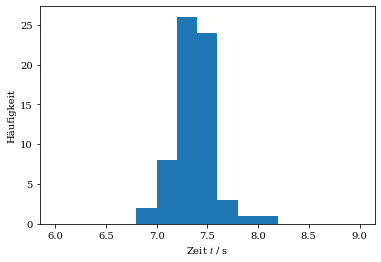

In [102]:
bconts, bedges, _p = plt.hist(t_digi, bins=np.linspace(6.0, 9.0, 16))
plt.ylabel('Häufigkeit')
plt.xlabel('Zeit $t$ / s ')
plt.show()

<AxesSubplot:ylabel='Count'>

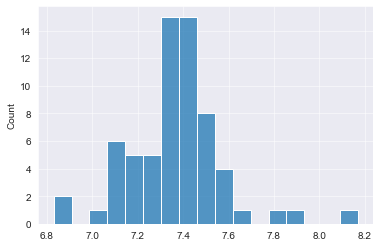

In [103]:
import seaborn as sns

sns.set_style('darkgrid')
sns.histplot(t_digi)

### Auswertung t_analog

In [104]:
print(np.mean(t_analog))
print(t_analog.size)

7.504
50


In [105]:
variance=(t_analog-np.mean(t_analog))**2/(t_analog.size-1)
stdev_analog=np.sqrt(np.sum(variance))
messunsicherheit_analog=stdev_analog/t_analog.size

In [106]:
print(np.mean(t_analog))
print(stdev_analog)
print(messunsicherheit_analog)

7.504
0.2626085781274526
0.0052521715625490515


In [107]:
np.around(stat.mean(t_analog),2)

7.5

In [108]:
np.around(stat.stdev(t_analog),3)

0.263

In [109]:
np.around(stat.stdev(t_analog)/t_analog.size,3)

0.005

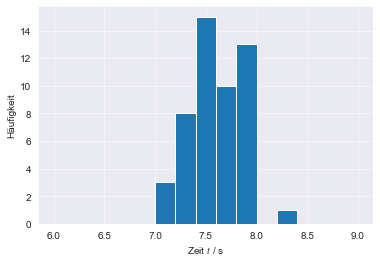

In [110]:
bconts, bedges, _p = plt.hist(t_analog, bins=np.linspace(6.0, 9.0, 16))
plt.ylabel('Häufigkeit')
plt.xlabel('Zeit $t$ / s ')
plt.show()

In [111]:
np.abs(t_analog_test-stat.mean(t_analog_train))<stat.stdev(t_analog_train)

array([ True,  True,  True, False, False,  True, False,  True,  True,
        True, False, False, False,  True])

<AxesSubplot:ylabel='Count'>

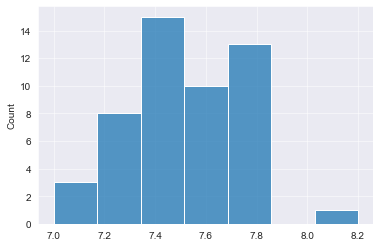

In [112]:
import seaborn as sns

sns.set_style('darkgrid')
sns.histplot(t_analog)

In [113]:
np.sum(np.abs(t_analog-stat.mean(t_analog))<stat.stdev(t_analog))/t_analog.size

0.5

In [114]:
np.sum(np.abs(t_analog-stat.mean(t_analog))>stat.stdev(t_analog))/t_analog.size

0.5

# Jahresauswertung

In [115]:
import pandas as pd
import statistics as stat
import seaborn as sns

In [116]:
data = pd.read_csv("WS21-22_Daten.csv")

In [117]:
data

,Gruppe,u,v,Felge,J,l,rho
0,A,3.714,-3.290,10.0,0.0594,78.62,NaN
1,A,4.036,-3.000,7.0,0.0537,78.00,NaN
2,A,3.730,-3.360,3.0,NaN,NaN,NaN
3,A,4.000,-3.250,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,Z2,4.370,-2.760,6.0,0.0910,89.67,0.0225
119,Z3,3.944,-2.814,5.0,0.0860,62.00,0.022
120,Z4,4.070,-3.140,2.0,0.0407,NaN,NaN


array([[<AxesSubplot:title={'center':'u'}>]], dtype=object)

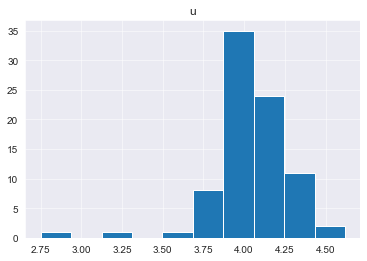

In [118]:
data.hist(column="u")

array([[<AxesSubplot:title={'center':'v'}>]], dtype=object)

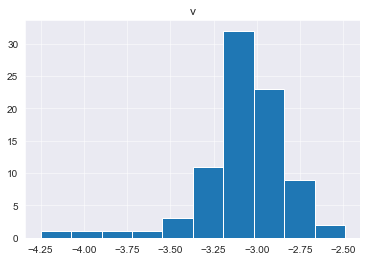

In [119]:
data.hist(column="v")

In [120]:
u=data.u

In [121]:
v=data.v

Text(4.233539277108434, 10.0, '4.0319')

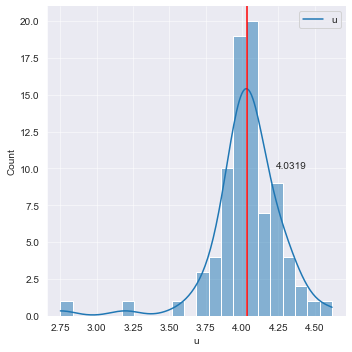

In [122]:
sns.set_style('darkgrid')
sns.displot(u,legend=True,kde=True)
plt.axvline(x=data.u.mean(),
            color='red')
plt.legend('u')
plt.text(x=data.u.mean()*1.05,y=10.0,s=np.around(data.u.mean(),4))

Text(-3.2373700000000007, 10.0, '-3.0832')

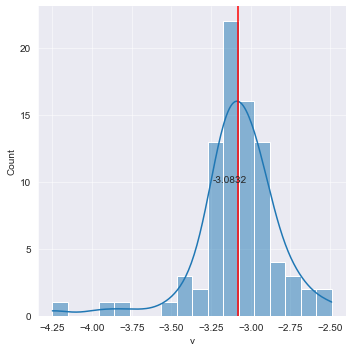

In [123]:
sns.set_style('darkgrid')
sns.displot(v,legend=True,kde=True)
plt.axvline(x=data.v.mean(),
            color='red')
plt.text(x=data.v.mean()*1.05,y=10.0,s=np.around(data.v.mean(),4))

In [124]:
data.mean()

u         4.031942
v        -3.083210
Felge     5.268293
J         0.080626
l        98.615836
dtype: float64

In [125]:
data.std()

u         0.245794
v         0.260452
Felge     2.867652
J         0.078659
l        32.894449
dtype: float64

In [126]:
data.count()

Gruppe    99
u         83
v         84
Felge     82
J         78
l         67
rho       61
dtype: int64

In [127]:
data.std()/np.sqrt(data.count())

Felge     0.316679
Gruppe         NaN
J         0.008906
l         4.018697
rho            NaN
u         0.026979
v         0.028418
dtype: float64

/Users/ce4714e/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


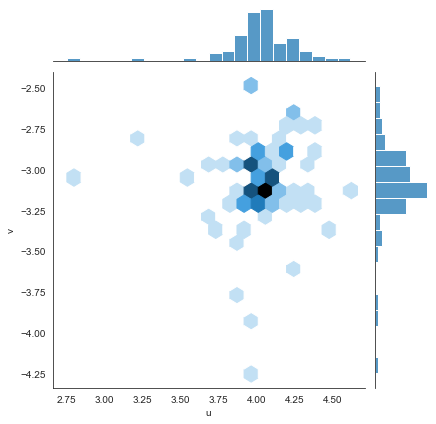

In [128]:
with sns.axes_style('white'):
    graph = sns.jointplot("u", "v", data, kind='hex')


Text(0.08465692307692312, 10.0, '0.0806')

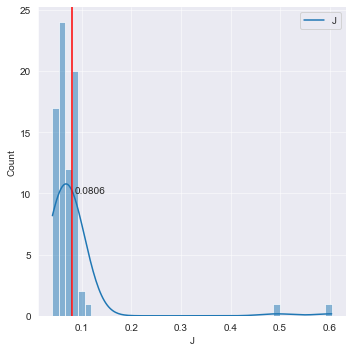

In [129]:
sns.set_style('darkgrid')
sns.displot(data.J,legend=True,kde=True)
plt.axvline(x=data.J.mean(),
            color='red')
plt.legend('J')
plt.text(x=data.J.mean()*1.05,y=10.0,s=np.around(data.J.mean(),4))

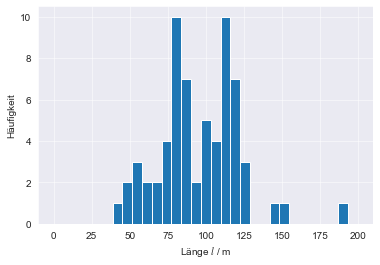

In [130]:
l_mess=data.l
bconts, bedges, _p = plt.hist(l_mess, bins=np.linspace(0, 200, 32))
plt.ylabel('Häufigkeit')
plt.xlabel('Länge $l$ / m ')
plt.show()

In [134]:
%load_ext watermark
%watermark -v -m -p numpy,sns,sklearn,scipy,pandas,watermark,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

numpy     : 1.20.1
sns       : 0.1
sklearn   : 0.0
scipy     : 1.6.2
pandas    : 1.2.4
watermark : 2.3.0
matplotlib: 3.3.4

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

